# Linear Regression

Recall that Regression problems are aiming to predict continuous values (e.g. Price, Age, Salary, ...)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

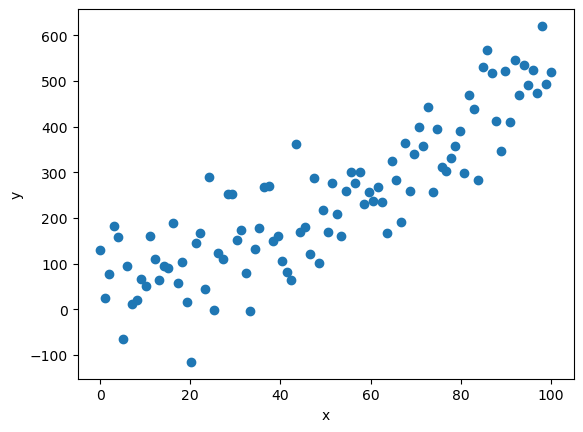

In [2]:
# Plot Data
np.random.seed(0)
x = np.linspace(0, 100, 100)
y = 5 * x - 12
ry = np.random.normal(scale=80,size=y.shape[0]) + y
# Initilize a DataFrame for the data
data = pd.DataFrame({'x': x, 'y':ry}).sample(frac=1).reset_index()[['index', 'y']].rename({'index':'x'}, axis=1)
plt.plot(x, ry, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

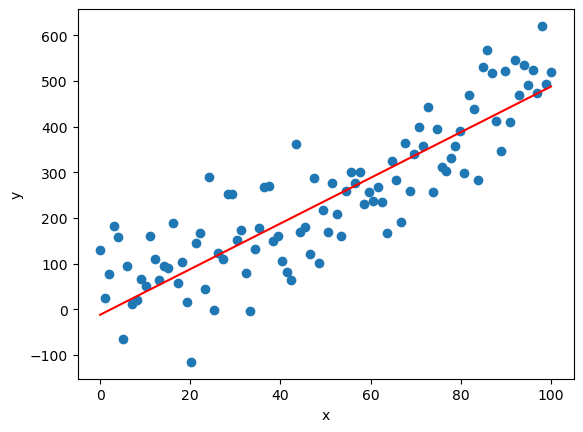

In [3]:
# Plot data with ground truth
plt.plot(x, ry, 'o')
plt.plot(x, y, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Psss...** <br>
The ground truth line is $y = 5x-12$. But, let's see if our Linear Regression model can discover this.

In [4]:
# Display data
data

,x,y
0,19,15.631937
1,6,94.310104
2,45,180.226783
3,57,300.076540
4,22,168.266007
...,...,...
95,13,63.390567
96,31,174.818658
97,85,568.964063
98,70,399.862599


The line we want to find has the form:
$$\hat{y} = \sum_{i=1}^{d} w_i \cdot x + w_0$$
And because we have only **one** variable, this can be written as:
$$\hat{y} = w_1 \cdot x + w_0$$
If we have **two** input variables:
$$\hat{y} = w_1 \cdot x_1 + w_2 \cdot x_2 + w_0$$
And so on...

The whole goal of **model fitting** is to find the weigths $w_i$ such that it results in the least prediction error.
We will go deeper in the next lesson.

Let's now see how it is fitted using `scikit-learn`.

In [5]:
# Initialize the model
from sklearn.linear_model import LinearRegression

# We have x (the input (1 variable)) and y (what we want to predict).
model = LinearRegression()

In [13]:
data['x2'] = 2

In [19]:
# Fit the model
x = data['x'].values.reshape((-1, 1))
y = data['y'].values
model.fit(x, y)

LinearRegression()

In [20]:
# Let's inspect the coeficients! (w_1 in our case, since we have only one variable)
w_1 = model.coef_

In [21]:
# And the intercept.. (w_0)
w_0 = model.intercept_

In [22]:
w_1

array([4.81024092])

In [10]:
w_0

array([4.67771583])

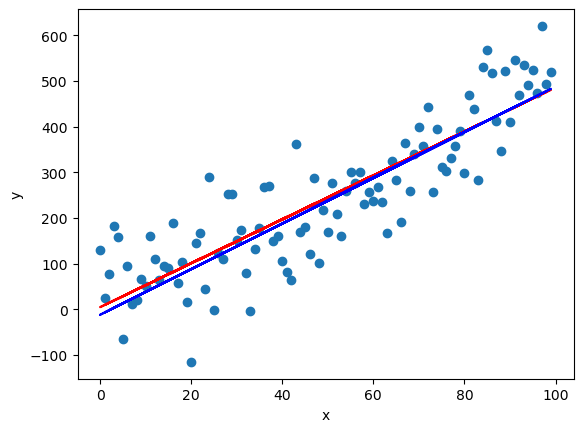

In [11]:
pred_line = w_1[0,0] * x.reshape(-1) + w_0[0]
plt.plot(x.reshape(-1), data['y'], 'o')
plt.plot(x.reshape(-1), pred_line, 'r-')
plt.plot(x.reshape(-1), 5 * x - 12, 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
ypred = model.predict(x)
print("MSE error:", mean_squared_error(y, ypred))
print("RMSE: ", np.sqrt(mean_squared_error(y, ypred)))

MSE error: 6453.189462199118
RMSE:  80.33174629123357


**Wow!** The Linear Regression Model could figure out this relation!

Now, let's have a look on how can we use it in a real dataset from Kaggle:  <br>
Here is the link: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

Video's notebook: https://www.kaggle.com/noussaons/linear-regression